### **1. Importing necessary libraries**

In [1]:
import numpy as np
import cv2
import os
from keras.models import load_model
from subroutines.loss_metrics import (
    Weighted_Cross_Entropy,
    Precision_dil,
    F1_score,
    F1_score_dil
)

### **2. Loss functions**

Some customizer loss functions are used in the training of the model. These functions are required to load the U-Net-MobileNet.

In [3]:
loss = Weighted_Cross_Entropy(10)
precision_dil = Precision_dil
f1_score = F1_score
f1_score_dil = F1_score_dil

### **3. Importing the model and its weights**

The U-Net-MobileNet was trained with a dataset of images and their masks. The dataset altogether contains 480 images. Down below, there are some images from the dataset.


!["images"](../notebook/images/images.png)
!["masks"](../notebook/images/masks.png)

source: D. Dais, İ.E. Bal, E. Smyrou, V. Sarhosis, Automatic crack classification and segmentation on masonry surfaces using convolutional neural networks and transfer learning, Automation in Construction. 125 (2021), pp. 103606.

Loading the U-Net model.

In [5]:
model = load_model(
    'output/checkpoints/crack_detection_3_epoch_20_F1_score_dil_0.776.h5',
    custom_objects={
        'loss': loss,
        'Precision_dil': precision_dil,
        'F1_score': f1_score,
        'F1_score_dil': f1_score_dil
    }
)

model.load_weights(
    'output/weights/crack_detection_1_epoch_9_F1_score_dil_0.812.h5'
)

### **4. Segmenting and plotting images**

Using the model for segmentation of other images and plotting the results.

In [6]:
def segmentation(path):
    """
    Gera predições de saída para as amostras de entrada
    
    Args:
        path (str): recebe o caminho das imagens para segmentação

    Returns:
        y_pred (numpy array): array contendo as predições
    """
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0

    y_pred = model.predict(np.expand_dims(img, axis=0))

    return y_pred

In [9]:
input_directory = "notebook/images"
output_directory = "notebook/segmented_images"
total_images_to_segment = 4

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

image_files = sorted(os.listdir(input_directory))

In [10]:
for i, image_name in enumerate(image_files):
    if i >= total_images_to_segment:
        break

    image_path = os.path.join(input_directory, image_name)

    if os.path.exists(image_path):
        pred = segmentation(image_path)
        mask_name = f'{image_name.split(".")[0]}.jpg'
        mask_path = os.path.join(output_directory, mask_name)
        cv2.imwrite(mask_path, (pred[0] * 255.0).astype(np.uint8))

1/1 [==============================] - 0s 278ms/step


The original dataset was segmented; the results appear in the figure below.

<img src="../notebook/images/images_masks.png">

Additionally, other images are also segmented; This time we segmented an image without a crack.

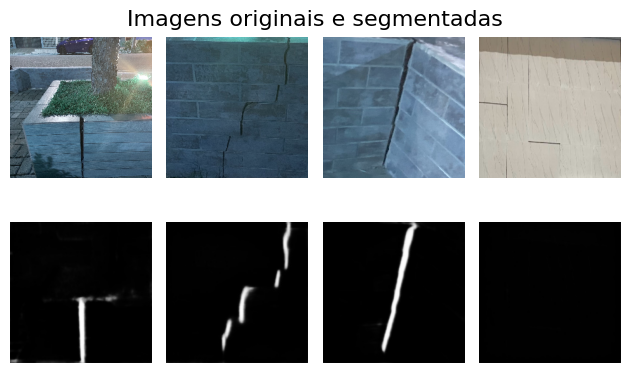

In [6]:
import matplotlib.pyplot as plt

n = 4  # número de pares de imagens/máscaras
fig, axs = plt.subplots(2, n)
fig.suptitle('Imagens originais e segmentadas', fontsize=16, y=0.86)

for i in range(n):
    img1 = cv2.imread(f'notebook/images/amostra{i+1}.jpg')
    img1 = cv2.resize(img1, (224, 224))
    axs[0, i].imshow(img1)
    axs[0, i].axis('off')

    img2 = cv2.imread(f'notebook/segmented_images/amostra{i+1}.jpg')
    img2 = cv2.resize(img2, (224, 224))
    axs[1, i].imshow(img2, cmap='gray')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()